# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [4]:
#function

df_raw.describe()


/Users/krys/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


In [6]:
df_raw


,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The dispersion of the gre data to the gre mean is much more significant than for the gpa data (where the variance is much closer to the mean).

#### Question 4. Drop data points with missing data


In [7]:
df_raw = df_raw.dropna()

In [8]:
df_raw.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Because the first time df_raw.count() ran, the Admit field showed 400. After running df_raw = df_raw.dropna(), then re-running df_raw.count(), the Admit field shows 397. (Plus I double-checked by manually looking at the csv file.)

#### Question 6. Create box plots for GRE and GPA

/Users/krys/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


{'boxes': [<matplotlib.lines.Line2D at 0x1033d15d0>],
 'caps': [<matplotlib.lines.Line2D at 0x114239850>,
 'fliers': [<matplotlib.lines.Line2D at 0x114248b50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x114248510>],
 'whiskers': [<matplotlib.lines.Line2D at 0x114225b10>,
  <matplotlib.lines.Line2D at 0x114239210>]}

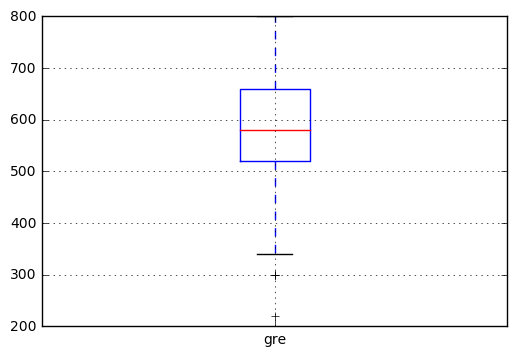

In [9]:
#boxplot 1
df_raw.boxplot('gre')

/Users/krys/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


{'boxes': [<matplotlib.lines.Line2D at 0x114d8fe50>],
 'caps': [<matplotlib.lines.Line2D at 0x114d9dc90>,
 'fliers': [<matplotlib.lines.Line2D at 0x114da9f90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x114da9950>],
 'whiskers': [<matplotlib.lines.Line2D at 0x114d9d090>,
  <matplotlib.lines.Line2D at 0x1033d1190>]}

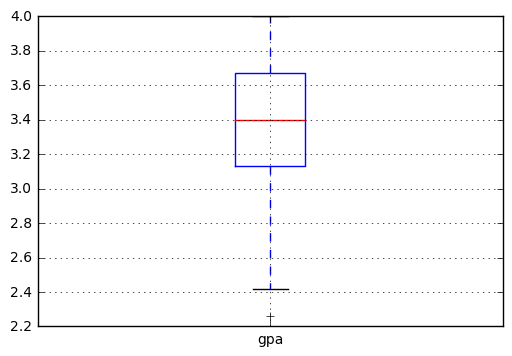

In [10]:
#boxplot 2 
df_raw.boxplot('gpa')

#### Question 7. What do this plots show?

Answer: For variables 'gre' and 'gpa', these plots show:

- minimum and maximum values 
- median (red line)
- first and third quartiles (and hence the interquartile range)

#### Question 8. Describe each distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114d46d50>]], dtype=object)

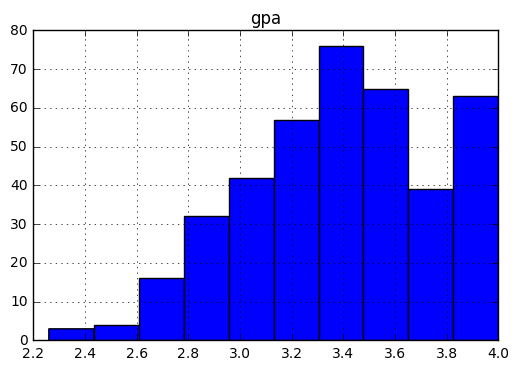

In [11]:
# plot the distribution of each variable 
df_raw.hist('gpa')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1158a4ad0>]], dtype=object)

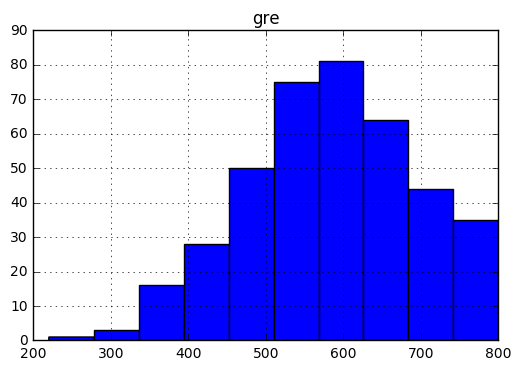

In [12]:
df_raw.hist('gre')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115a11b90>]], dtype=object)

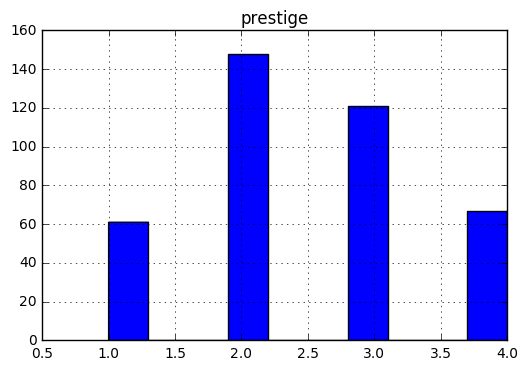

In [13]:
df_raw.hist('prestige')

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No because GPA does not follow normal distribution.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes. Because 'gpa' does not follow normal distribution, it's difficult to determine GPA's correlation to 'admit'. Convert 'gpa' to log data, then use statsmodels to calculate OLS regression results.

#### Question 11. Which of our variables are potentially colinear? 

In [14]:
# create a correlation matrix for the data
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


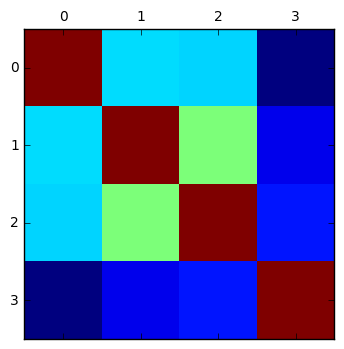

In [15]:
plt.matshow(df_raw.corr())
#tried something else for fun

#### Question 12. What did you find?

Answer: There is little to no correlation among the variables.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 

1. Change the 'Prestige' column to dummy variables (Prestige 1, Prestige 2, etc) and assign binary values (0, 1) to each of the four columns.

2. Make 'Prestige 1' the baseline and remove it from data that will be included in linear regression.

3. Run a linear regression analysis using 'admit' as the target variable (y) and prestige as independent variable (x). 

#### Question 14. What is your hypothesis? 

Answer: Specific to 'admit' and 'prestige', my hypothesis is that the higher the 'prestige' of an undergraduate school, the greater the likelihood of being admitted to grad school.

What I'm more interested in is calculating the weight (or Beta, I think) of the independent factors in terms of the admit decision-making process. For instance, how much weight is given to 'gre' vs 'gpa' vs 'prestige' and does the weight fluctuate based on the values of the independent factors.

I have to learn how to do this!

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data